# Problem statement -
Build multiple machine learning models and select best one for sentiment analysis. Based on user comment your model should be able to predict if the movie is worth to watch or not.
Two dataset is given IMDB-Dataset 1 and IMDB-Dataset 2

# IMDB-Dataset 1 (NLP)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [2]:
imdb=pd.read_csv('IMDB-Dataset 1.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Top 5 heads of the datset.

# EDA

In [3]:
# checking shape
imdb.shape

(24999, 2)

We have 24999 rows and 2 columns in the dataset.

In [4]:
# checking the counts of positive and negative in sentiment columns
print('positive and negative counts',"\n",imdb.sentiment.value_counts())

positive and negative counts 
 negative    12525
positive    12474
Name: sentiment, dtype: int64


In [5]:
# checking ratio of positive andd negative
print("postive ratio =", round(len(imdb[imdb['sentiment']=='positive'])/len(imdb.sentiment),2)*100,'%')
print("negative ratio =",round(len(imdb[imdb['sentiment']=='negative'])/len(imdb.sentiment),2)*100,'%')

postive ratio = 50.0 %
negative ratio = 50.0 %


In [6]:
# New column for length of review
imdb['length_of_review']=imdb.review.str.len()
imdb.head()

,review,sentiment,length_of_review
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


Now we can see one column 'length of review' has been added in the datset and giving length of the reviews.

In [7]:
# converting all review to lower case
imdb['review']=imdb['review'].str.lower()

In [8]:
# label codind 0 and 1
imdb['sentiment'].replace({'positive':0,'negative':1},inplace=True)

Now  sentiment column has been converted into 0 and 1 and review column is converted into lower case.

In [9]:
# Replace email addresses with 'email'
imdb['review']=imdb['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                           'emailaddress')

In [10]:
# Replace URLs with 'webaddress'
imdb['review']=imdb['review'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                            'webaddress')

In [11]:
# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156)
imdb['review']=imdb['review'].str.replace(r'£|\$','dollers')

In [12]:
# Replace 10 didgit phone numbers(formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
imdb['review']=imdb['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')

In [13]:
# replace numbers with 'numbr'
imdb['review']=imdb['review'].str.replace(r'\d+(\.\d+)?','numbr')

In [14]:
# Remove Punctuation
imdb['review']=imdb['review'].str.replace(r'[^\w\d\s]',' ')


# Replace whitespace between terms with a single space
imdb['review']=imdb['review'].str.replace(r'\s+', ' ')


# Remove Leading and trailing whitespace
imdb['review']=imdb['review'].str.replace(r'^\s+|\s+?$','')

In [15]:
imdb.head()

,review,sentiment,length_of_review
0,one of the other reviewers has mentioned that ...,0,1761
1,a wonderful little production br br the filmin...,0,998
2,i thought this was a wonderful way to spend ti...,0,926
3,basically there s a family where a little boy ...,1,748
4,petter mattei s love in the time of money is a...,0,1317


So data is looking fine and clean now.

# Removing stopwords

In [16]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

imdb['review']=imdb['review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [17]:
# new column for clean length
imdb['clean_length']=imdb.review.str.len()
imdb.head()

,review,sentiment,length_of_review,clean_length
0,one reviewers mentioned watching numbr oz epis...,0,1761,1127
1,wonderful little production br br filming tech...,0,998,674
2,thought wonderful way spend time hot summer we...,0,926,590
3,basically family little boy jake thinks zombie...,1,748,463
4,petter mattei love time money visually stunnin...,0,1317,876


Now we can see the cleaned_lenth column is giving clean length of the revew data data.

In [19]:
# Total Length removal
print('original length',imdb.length_of_review.sum())
print('clean length', imdb.clean_length.sum())

original length 32776690
clean length 20920138


In [27]:
# intalling wordcloud
!pip install wordcloud

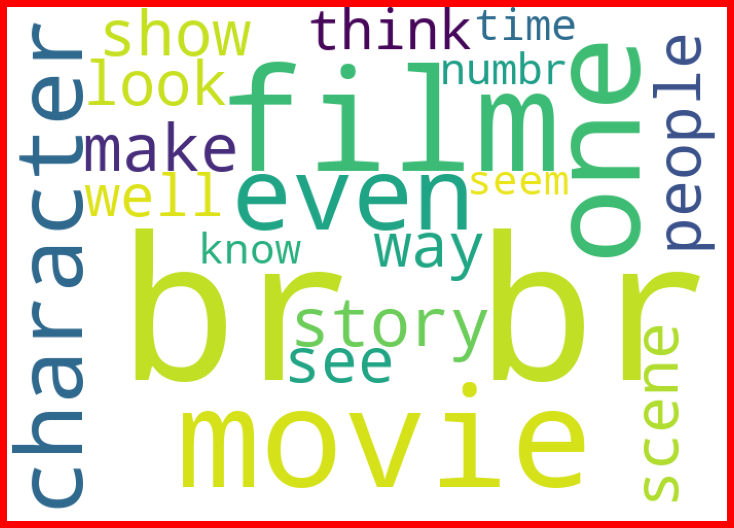

In [28]:
# getting sense of Loud words in negative

from wordcloud import WordCloud

negative=imdb['review'][imdb['sentiment']==1]

neg_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(negative))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(neg_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see these word are indication of negative.

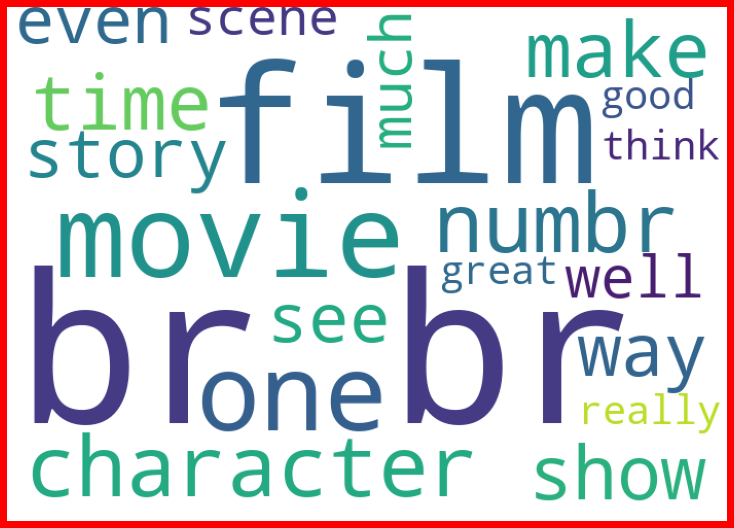

In [29]:
# getting sense of Loud words in positive

from wordcloud import WordCloud

positive=imdb['review'][imdb['sentiment']==0]

pos_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(positive))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(pos_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Model building

In [35]:
# 1. convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


tf_vec=TfidfVectorizer()
mnb=MultinomialNB()

features=tf_vec.fit_transform(imdb['review'])

x=features
y=imdb['sentiment']

In [36]:
# Train Test Split 
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=43)

# and Prediction
mnb.fit(x_train,y_train)
pred_y=mnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_y))
print('confusion matrix',confusion_matrix(y_test,pred_y))
print('classifiaction report',classification_report(y_test,pred_y))

accuracy score 0.86288
confusion matrix [[2625  523]
 [ 334 2768]]
classifiaction report               precision    recall  f1-score   support

           0       0.89      0.83      0.86      3148
           1       0.84      0.89      0.87      3102

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



In [38]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.8638344308861772


So we are getting approx 87% accuracy score and cross validation score in IMDB-Dataset 1, Now we will predict the IMDB-Dataset 2 accuracy and make comaprison .

# IMDB-Dataset 2 (NLP)

In [47]:
imdb2=pd.read_csv('IMDB-Dataset2.csv')
imdb2.head()

,review,sentiment
0,This movie was bad from the start. The only pu...,negative
1,"God, I never felt so insulted in my whole life...",negative
2,Not being a fan of the Coen Brothers or George...,positive
3,The movie Andaz Apna Apna in my books is the t...,positive
4,I have to say I was really looking forward on ...,negative


# EDA

In [50]:
# checking shape
imdb2.shape

(25000, 2)

25000 rows and 2 columns in the dataset.

In [51]:
# checking the counts of positive and negative in sentiment columns
print('positive and negative counts',"\n",imdb2.sentiment.value_counts())

positive and negative counts 
 positive    12526
negative    12474
Name: sentiment, dtype: int64


In [54]:
# checking ratio of positive andd negative
print("postive ratio =", round(len(imdb2[imdb2['sentiment']=='positive'])/len(imdb2.sentiment),2)*100,'%')
print("negative ratio =",round(len(imdb2[imdb2['sentiment']=='negative'])/len(imdb2.sentiment),2)*100,'%')

postive ratio = 50.0 %
negative ratio = 50.0 %


In [58]:
# New column for length of review
imdb2['length_of_review']=imdb.review.str.len()
imdb2.head()

,review,sentiment,length_of_review
0,This movie was bad from the start. The only pu...,negative,1127.0
1,"God, I never felt so insulted in my whole life...",negative,674.0
2,Not being a fan of the Coen Brothers or George...,positive,590.0
3,The movie Andaz Apna Apna in my books is the t...,positive,463.0
4,I have to say I was really looking forward on ...,negative,876.0


In [59]:
# converting all review to lower case
imdb2['review']=imdb2['review'].str.lower()

In [60]:
# label codind 0 and 1
imdb2['sentiment'].replace({'positive':0,'negative':1},inplace=True)

In [61]:
# Replace email addresses with 'email'
imdb2['review']=imdb2['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                           'emailaddress')

In [62]:
# Replace URLs with 'webaddress'
imdb2['review']=imdb2['review'].str.replace(r'^http\://a[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                            'webaddress')

In [63]:
# Replace money symbols with 'moneysymb'(£ can be typed with ALT + 156)
imdb2['review']=imdb2['review'].str.replace(r'£|\$','dollers')

In [64]:
# Replace 10 didgit phone numbers(formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
imdb2['review']=imdb2['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                         'phonenumber')

In [65]:
# replace numbers with 'numbr'
imdb2['review']=imdb2['review'].str.replace(r'\d+(\.\d+)?','numbr')

In [66]:
# Remove Punctuation
imdb2['review']=imdb2['review'].str.replace(r'[^\w\d\s]',' ')


# Replace whitespace between terms with a single space
imdb2['review']=imdb2['review'].str.replace(r'\s+', ' ')


# Remove Leading and trailing whitespace
imdb2['review']=imdb2['review'].str.replace(r'^\s+|\s+?$','')

In [68]:
imdb2.head()

,review,sentiment,length_of_review
0,this movie was bad from the start the only pur...,1,1127.0
1,god i never felt so insulted in my whole life ...,1,674.0
2,not being a fan of the coen brothers or george...,0,590.0
3,the movie andaz apna apna in my books is the t...,0,463.0
4,i have to say i was really looking forward on ...,1,876.0


# Removing stopwords

In [69]:
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','ure'])

imdb2['review']=imdb2['review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [70]:
# new column for clean length
imdb2['clean_length']=imdb2.review.str.len()
imdb2.head()

,review,sentiment,length_of_review,clean_length
0,movie bad start purpose movie angela wanted ge...,1,1127.0,406
1,god never felt insulted whole life crap many w...,1,674.0,901
2,fan coen brothers george clooney anyone see sk...,0,590.0,635
3,movie andaz apna apna books top numbr intellig...,0,463.0,1713
4,say really looking forward watching film findi...,1,876.0,1184


In [71]:
# Total Length removal
print('original length',imdb2.length_of_review.sum())
print('clean length', imdb2.clean_length.sum())

original length 20920138.0
clean length 20842409


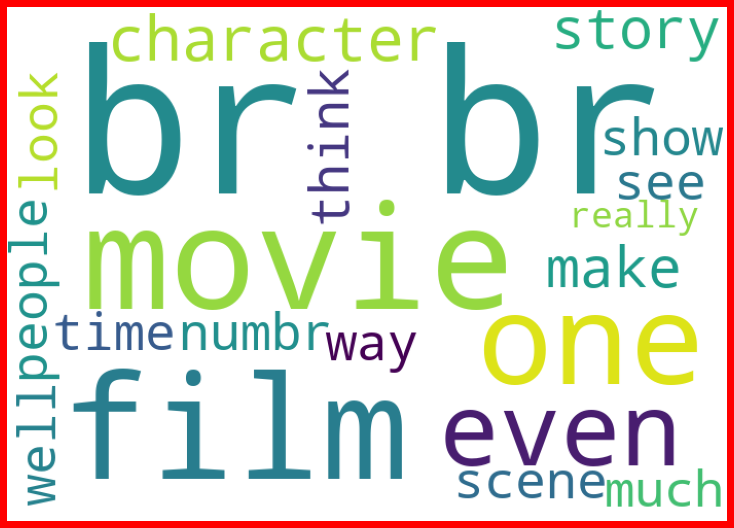

In [72]:
# getting sense of Loud words in negative
# from word cloud
from wordcloud import WordCloud

negative=imdb2['review'][imdb2['sentiment']==1]

neg_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(negative))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(neg_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

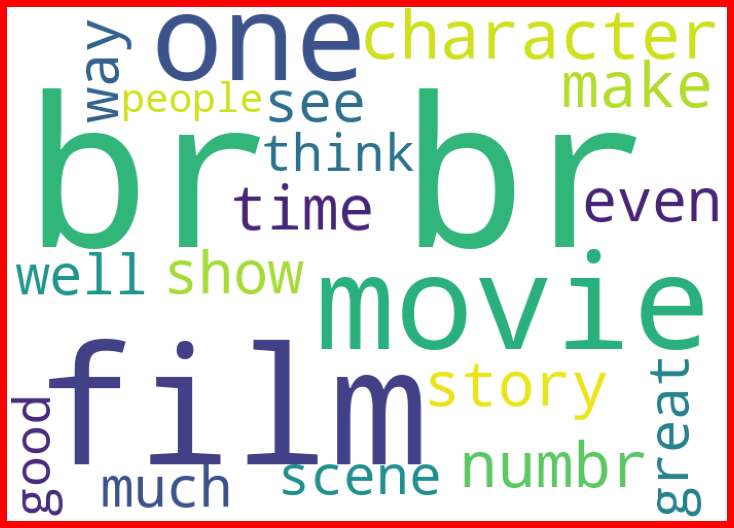

In [73]:
# getting sense of Loud words in positive

from wordcloud import WordCloud

positive=imdb2['review'][imdb2['sentiment']==0]

pos_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(positive))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(pos_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Model Building

In [76]:
# 1. convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


tf_vec=TfidfVectorizer()
mnb=MultinomialNB()

features=tf_vec.fit_transform(imdb2['review'])

x=features
y=imdb2['sentiment']

In [77]:
# Train Test Split 
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=43)

# and Prediction
mnb.fit(x_train,y_train)
pred_y=mnb.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_y))
print('confusion matrix',confusion_matrix(y_test,pred_y))
print('classifiaction report',classification_report(y_test,pred_y))

accuracy score 0.86
confusion matrix [[2611  542]
 [ 333 2764]]
classifiaction report               precision    recall  f1-score   support

           0       0.89      0.83      0.86      3153
           1       0.84      0.89      0.86      3097

    accuracy                           0.86      6250
   macro avg       0.86      0.86      0.86      6250
weighted avg       0.86      0.86      0.86      6250



In [78]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.86144


So in IMDB-Dataset 2 we are getting approx 87% accuracy and cross validation score same as in IMDB-Dataset 1.

# Final conclusion

So on comparison between both the Datset the ,based on user comment , both the movie is absolutely worth to watch.